# Phase 1: Preparation

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')



**Define Columns**

In [74]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names


df_train = pd.read_csv(('/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt'), sep='\s+', header=None, names=col_names)
df_test = pd.read_csv(('/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt'), sep='\s+', header=None, names=col_names)
df_test_RUL = pd.read_csv(('/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt'), sep='\s+', header=None, names=['RUL'])

In [75]:
df_train = pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt', sep='\s+', header=None, names=col_names)
df_test = pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt', sep='\s+', header=None, names=col_names)
df_rul = pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])


**Data Info**

In [76]:
df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [78]:
print(df_train.head())
print(df_train.info())
print(df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20631 non-null  int64  
 1   cycle                                    20631 non-null  int64  
 2   setting_1                                20631 non-null  float64
 3   setting_2                                20631 non-null  float64
 4   setting_3                                20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

engine                                     0
cycle                                      0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

**Engine Lifetime Distribution**

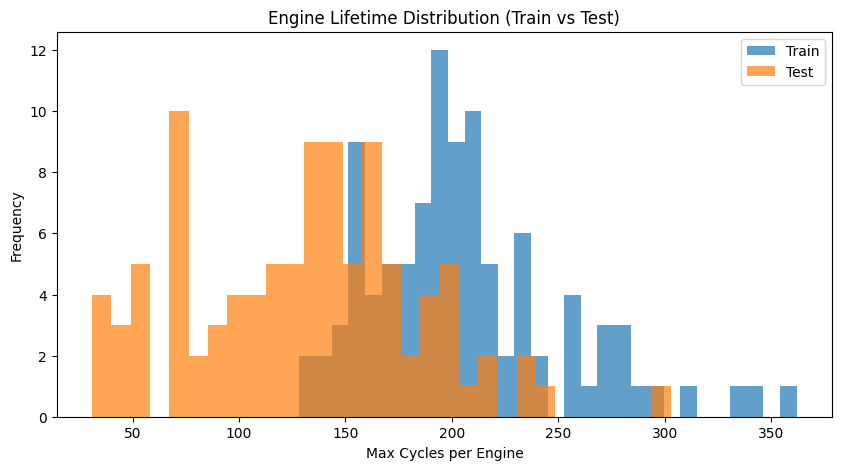

In [103]:
train_lifetimes = df_train.groupby("engine")["cycle"].max()
test_lifetimes = df_test.groupby("engine")["cycle"].max()

plt.figure(figsize=(10,5))
plt.hist(train_lifetimes, bins=30, alpha=0.7, label="Train")
plt.hist(test_lifetimes, bins=30, alpha=0.7, label="Test")
plt.xlabel("Max Cycles per Engine")
plt.ylabel("Frequency")
plt.title("Engine Lifetime Distribution (Train vs Test)")
plt.legend()
plt.show()


**Correlation Heatmap**

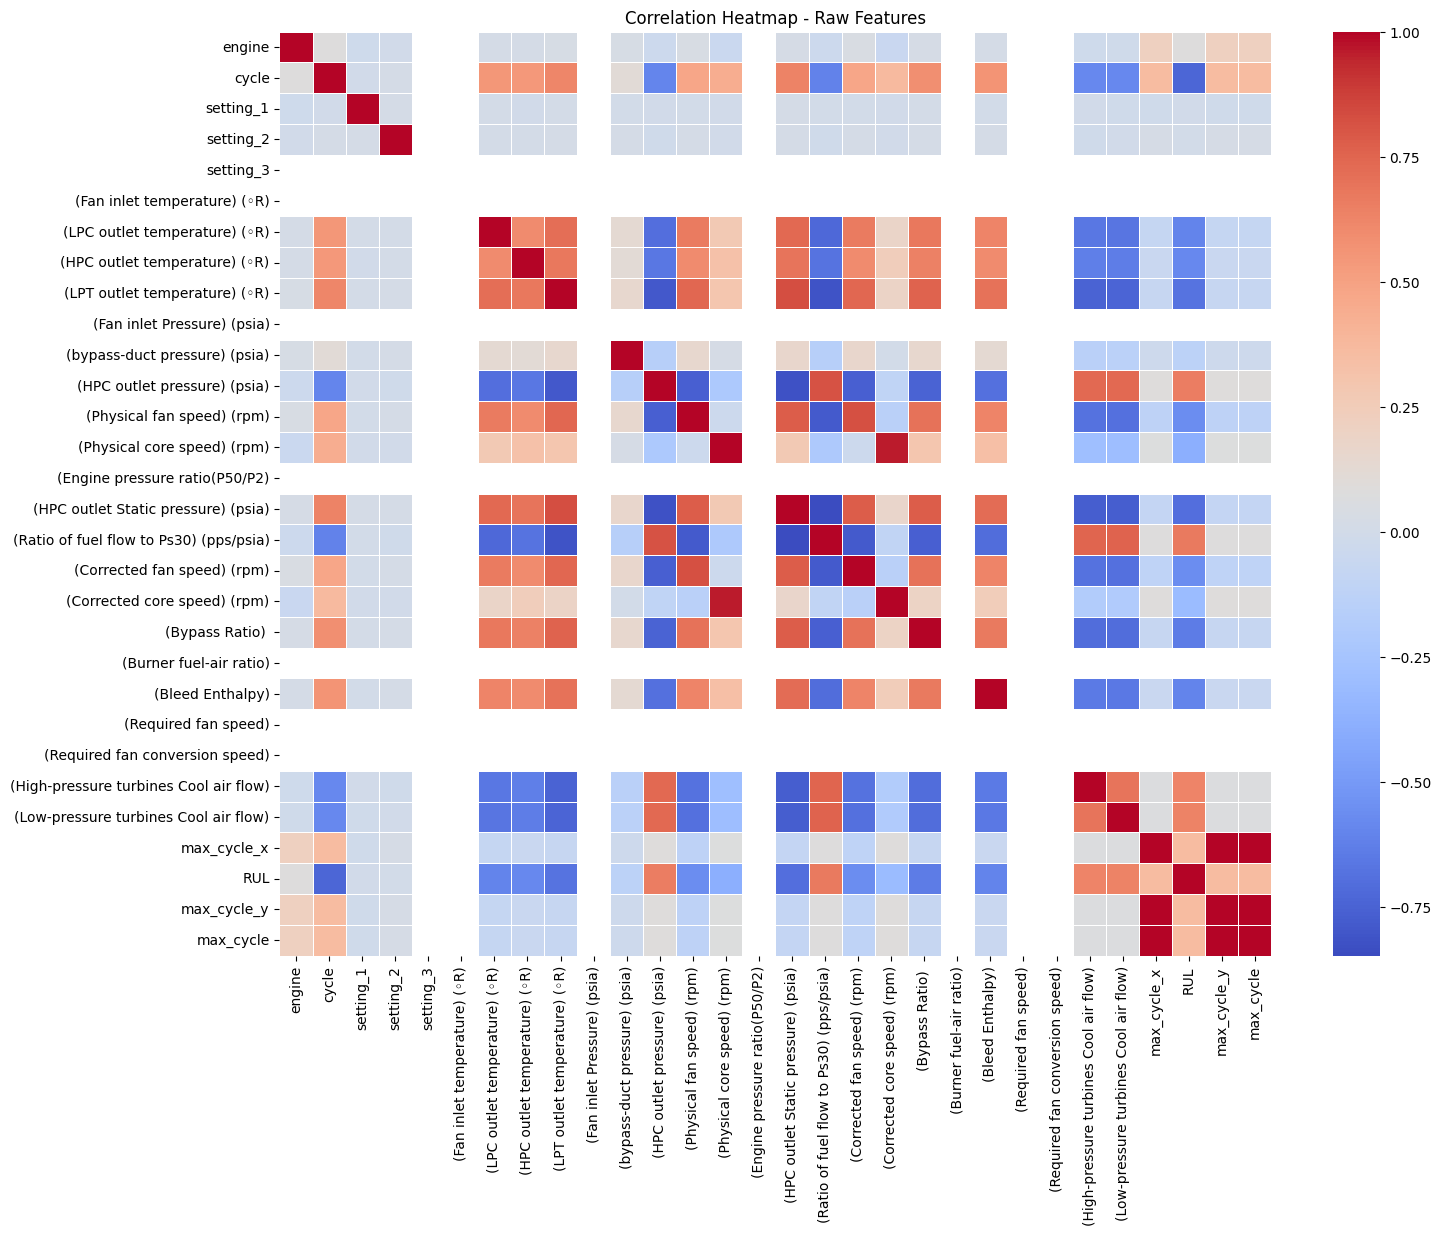

In [106]:
plt.figure(figsize=(16,12))
corr = df_train.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap - Raw Features")
plt.show()


**Sensor Distributions**

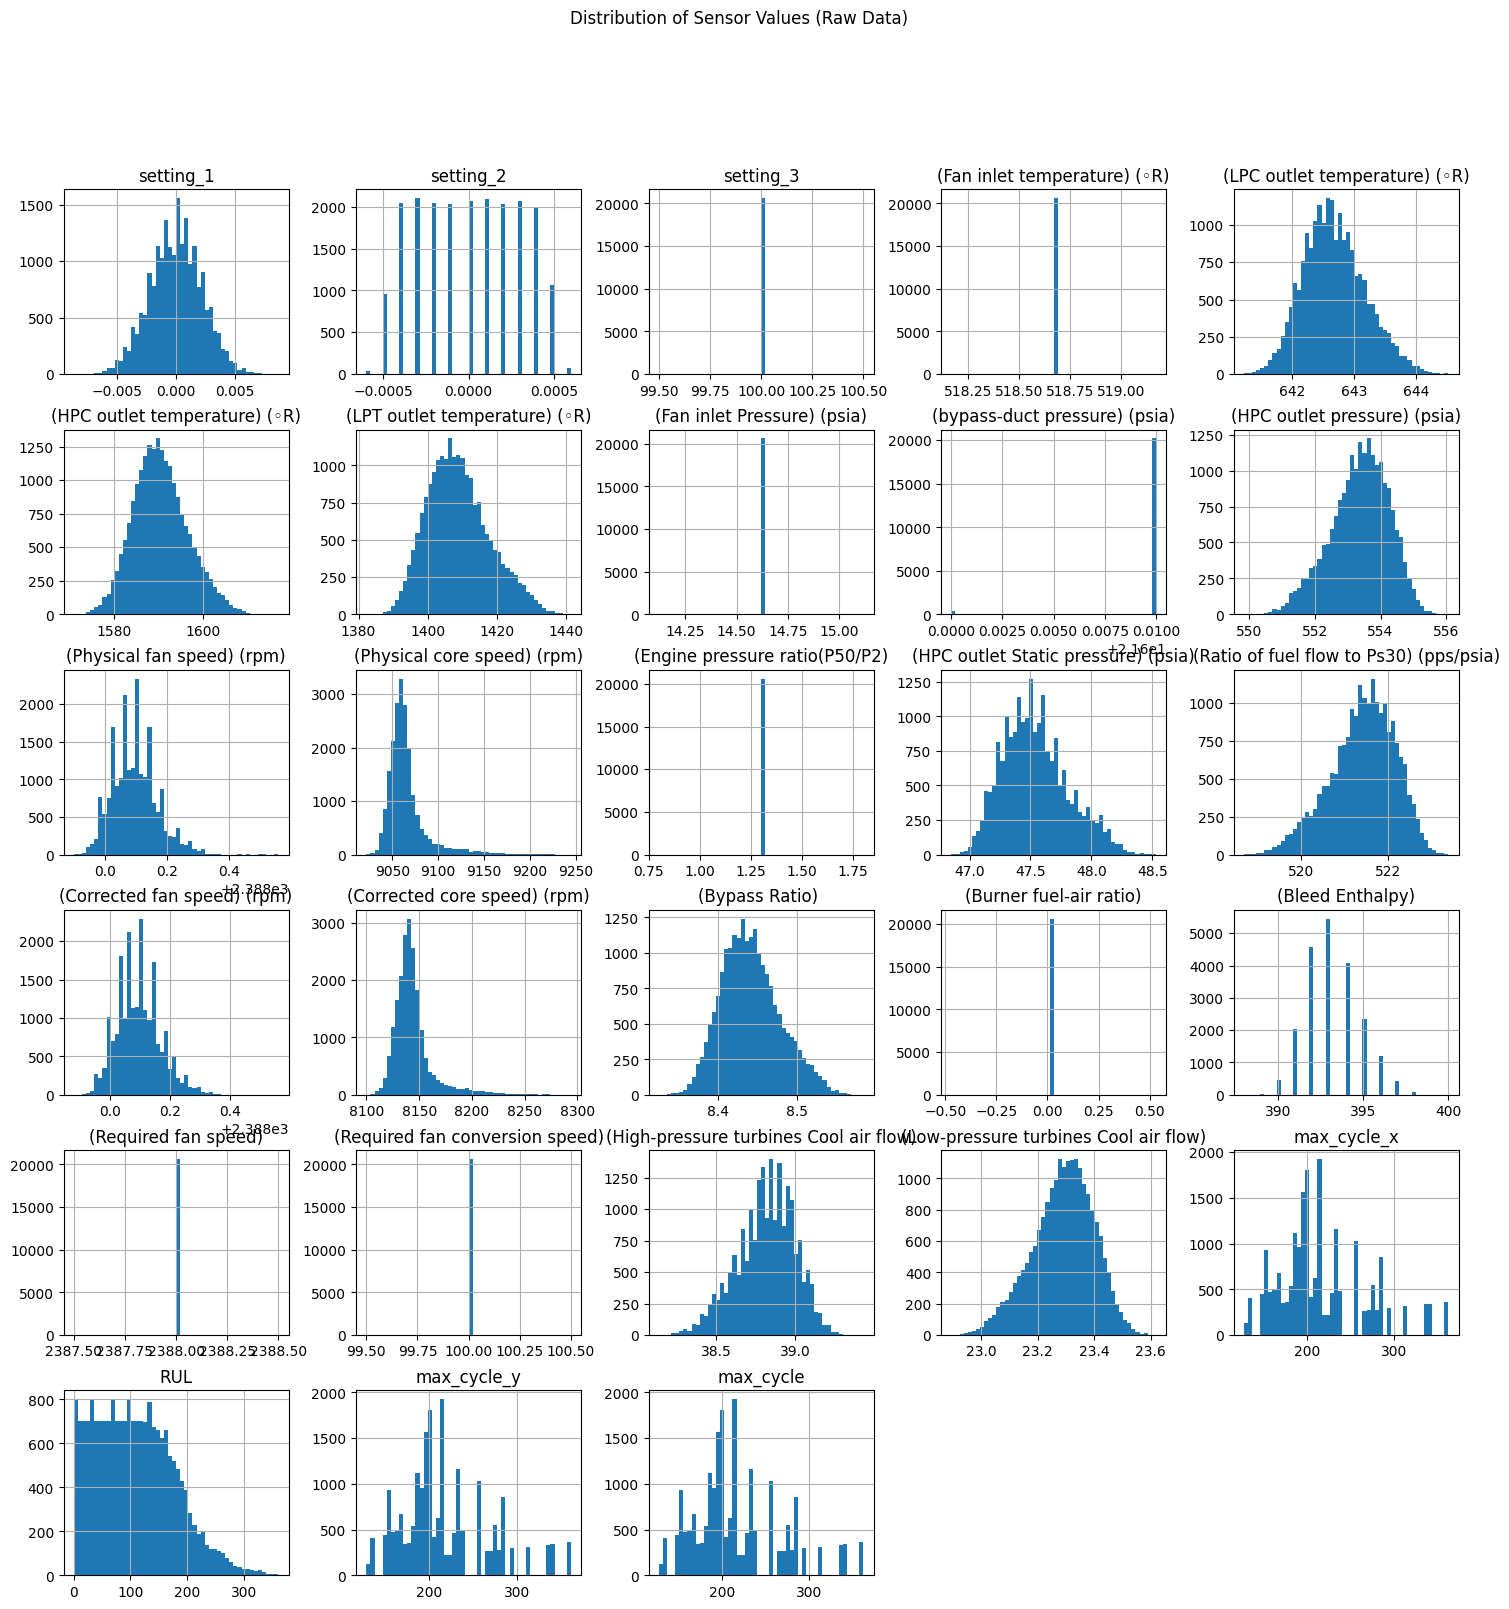

In [107]:
sensor_cols = [col for col in df_train.columns if col not in ['engine','cycle']]
df_train[sensor_cols].hist(figsize=(18,18), bins=50)
plt.suptitle("Distribution of Sensor Values (Raw Data)")
plt.show()


**Sensor Trends (Random Engines)**

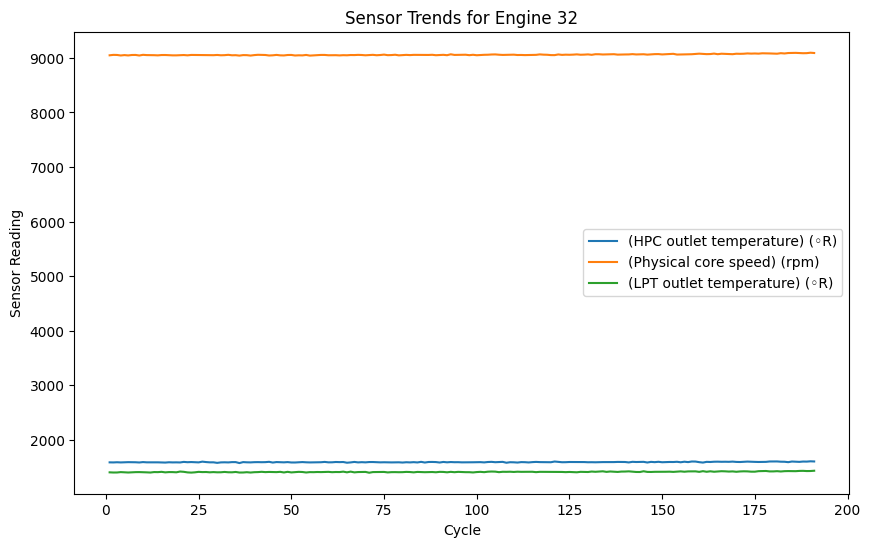

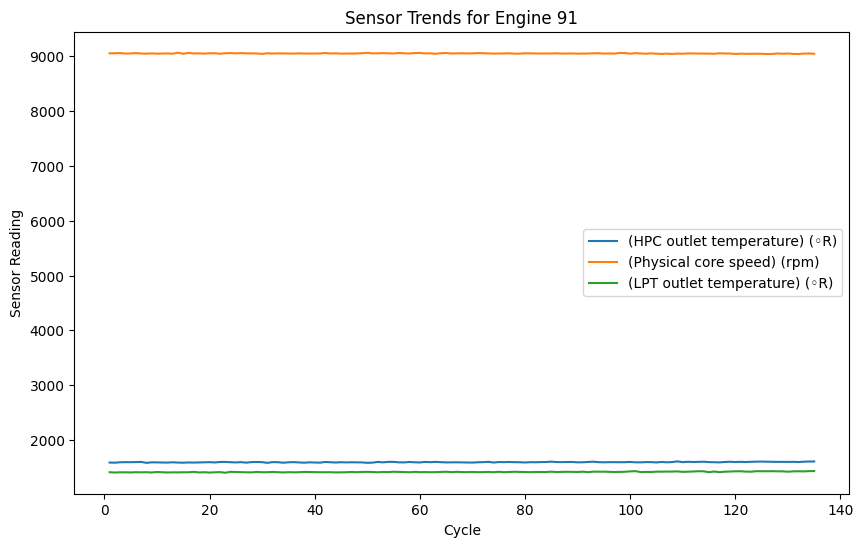

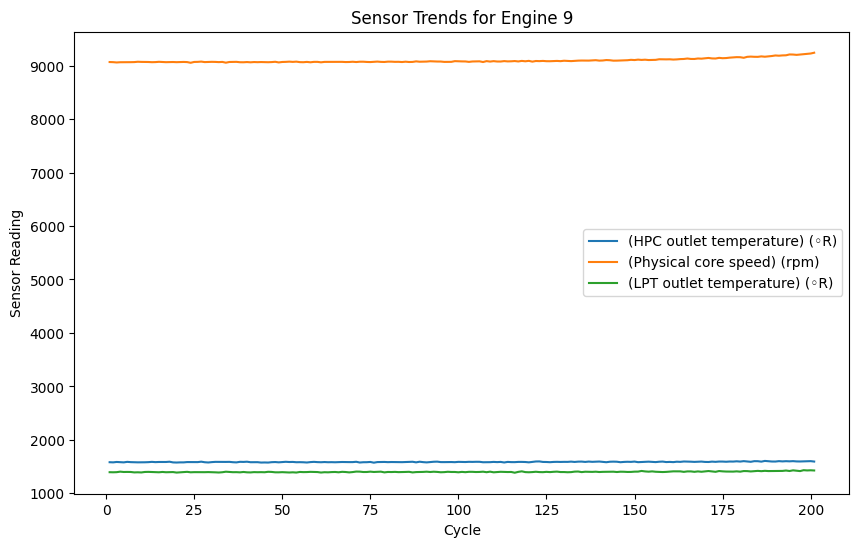

In [108]:
example_engines = random.sample(df_train['engine'].unique().tolist(), 3)
selected_sensors = [
    "(HPC outlet temperature) (◦R)",
    "(Physical core speed) (rpm)",
    "(LPT outlet temperature) (◦R)"
]

for eng in example_engines:
    subset = df_train[df_train['engine'] == eng]
    subset.plot(x="cycle", y=selected_sensors, figsize=(10,6))
    plt.title(f"Sensor Trends for Engine {eng}")
    plt.xlabel("Cycle")
    plt.ylabel("Sensor Reading")
    plt.show()


**Calculate RUL**

In [109]:
df_train["max_cycle"] = df_train.groupby("engine")["cycle"].transform("max")
df_train["RUL"] = df_train["max_cycle"] - df_train["cycle"]
df_train[df_train["engine"] == 1].tail()


,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),max_cycle_x,RUL,max_cycle_y,RUL_bin,max_cycle
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,396,2388,100.0,38.51,22.9588,192,4,192,0-50,192
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,395,2388,100.0,38.48,23.1127,192,3,192,0-50,192
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,398,2388,100.0,38.49,23.0675,192,2,192,0-50,192
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,394,2388,100.0,38.45,23.1295,192,1,192,0-50,192
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,396,2388,100.0,38.48,22.9649,192,0,192,NaN,192


**RUL Visualization**

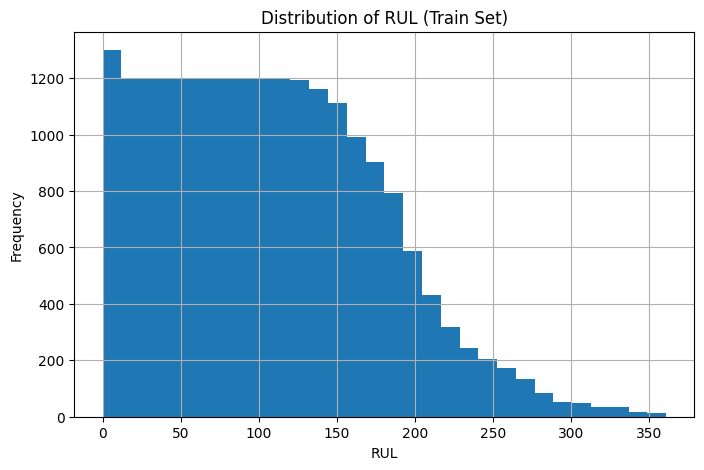

In [110]:
plt.figure(figsize=(8,5))
df_train["RUL"].hist(bins=30)
plt.title("Distribution of RUL (Train Set)")
plt.xlabel("RUL")
plt.ylabel("Frequency")
plt.show()


**Sensor vs RUL**

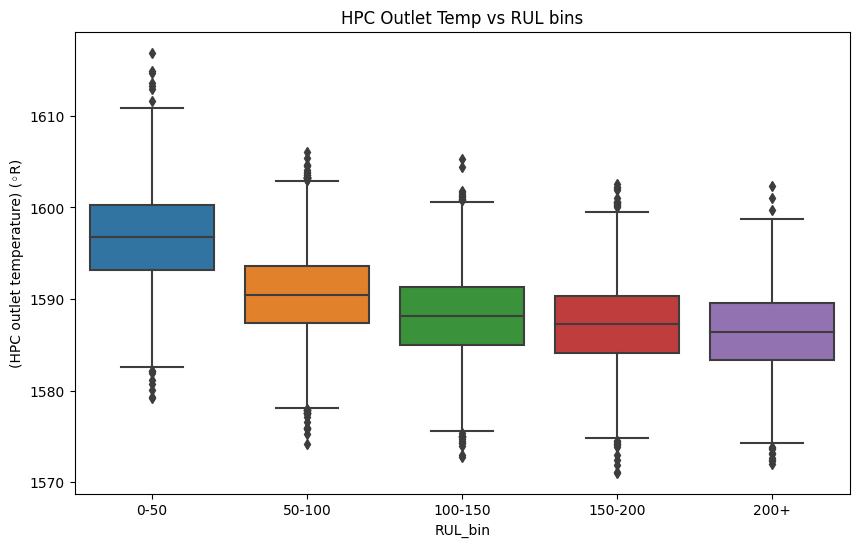

In [111]:
df_train["RUL_bin"] = pd.cut(df_train["RUL"], bins=[0,50,100,150,200,500], labels=["0-50","50-100","100-150","150-200","200+"])

plt.figure(figsize=(10,6))
sns.boxplot(x="RUL_bin", y="(HPC outlet temperature) (◦R)", data=df_train)
plt.title("HPC Outlet Temp vs RUL bins")
plt.show()


**Train vs Test Distribution)**

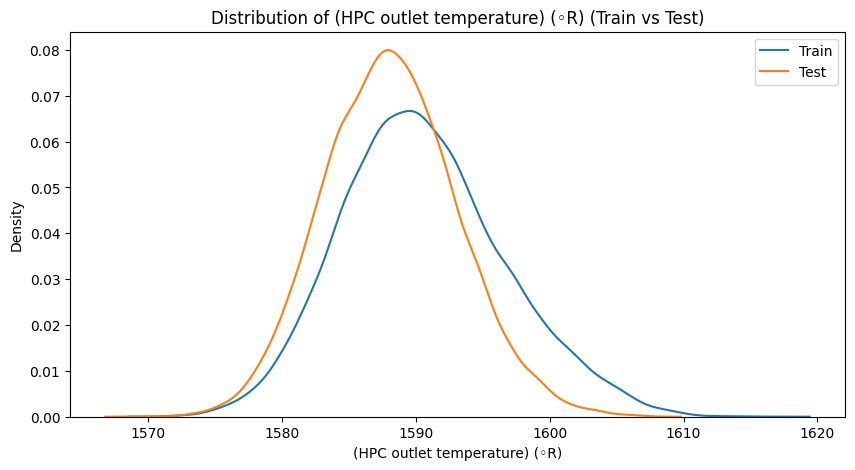

In [112]:
sensor = "(HPC outlet temperature) (◦R)"
plt.figure(figsize=(10,5))
sns.kdeplot(df_train[sensor], label="Train")
sns.kdeplot(df_test[sensor], label="Test")
plt.title(f"Distribution of {sensor} (Train vs Test)")
plt.legend()
plt.show()


**PCA**

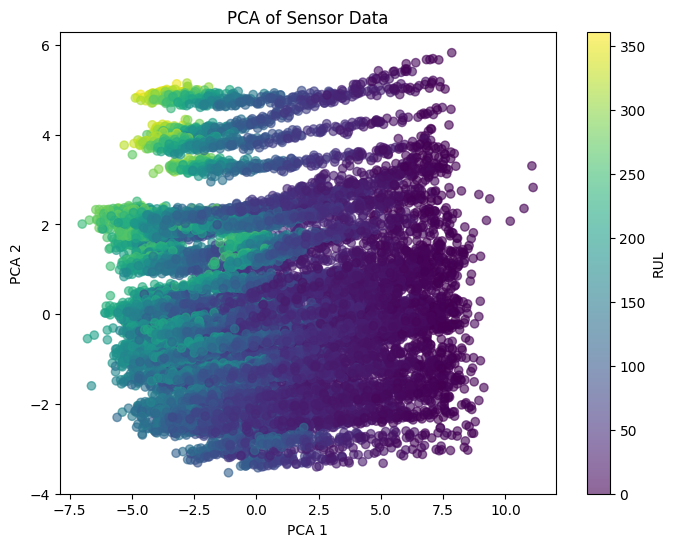

In [114]:
X = df_train[sensor_cols].select_dtypes(include=[np.number])
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1],
            c=df_train["RUL"], cmap="viridis", alpha=0.6)
plt.colorbar(label="RUL")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA of Sensor Data")
plt.show()
